In [1]:
#Include the UNSflow libraries
#Pkg.clone("git://github.com/KiranUofG/UNSflow")
include("../src/UNSflow.jl")
using UNSflow

Case 5 from the new paper
#### Table 1
|--|--|
|:----:|:-------:|
|Airfoil|SD-7003|
|Motion|Eldredge ramp|
|Smoothing parameter a|0.8|
|Amplitude|30 deg|
|Pivot point| 0.25|
|Nondim. pitch rate k|0.03|
|Reynolds number| 20k|
|LESP| 0.25|

CFD results and LDVM is compared with two versions of LDVM_KLB_TR model: with Cs formulas "piecewise" and "continuous".

$\alpha_1$, $S_1$, $S_2$ obtained for steady test cases are of no use here. Reason: different Reynolds number between steady state (Re > 100k) and this test case (Re = 20k).

Therefore a new set of static constants has been obtained iteratively to fit to experimental unsteady fsep data.

In [2]:
# Insert stating constants
    # static constants have been obtained iteratively, so as to give the best fsep prediction
    # fsep prediction was compared to experiment

    #Note how different they are from static constants from 2.3.
    #In my opinion the reason for that is low Reynolds number for this case.

    sepdef = SeparationParams(8.2, 7., 2.3,"Sheng",tf=1.2)

    alphadef = EldUptstartDef(30.*pi/180.,0.03, 0.8, 5.)
    hdef = ConstDef(0.)
    udef = ConstDef(1.) #Freestream velocity is a constant. Set as constant = 1

    #The full kinematics are collected as:
    full_kinem = KinemDef(alphadef, hdef, udef)

    pvt = 0.25 #QC
    lespcrit = [0.17;] #Note that the value is entered as an array. 
    dtstar = find_tstep(alphadef)
    time_total =16.319+4.
    nsteps = Int(round(time_total/dtstar))

    #insert data from experiment
    t = [3.94, 3.82, 3.67, 3.21, 2.75]
    f = [0.52, 0.57, 0.61, 0.69, 0.74];

In [3]:
nsteps

1355

In [4]:
# The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
#in the same folder. For eg. "sd7003.dat". 
#The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem,lespcrit)
curfield = TwoDFlowField()

#Now the code is run as :
#The variables mat, surf and curfield are returned
        
@time mat1, surf, curfield = ldvm_klb_tr(surf, curfield,sepdef, nsteps, dtstar);


390.539639 seconds (12.80 M allocations: 991.094 MB, 0.70% gc time)


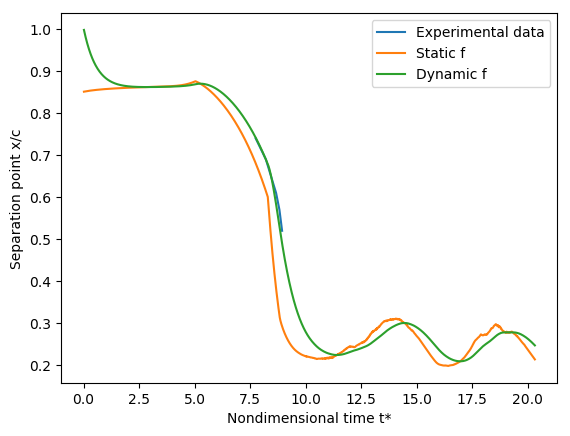

PyObject <matplotlib.legend.Legend object at 0x000000001CBE93C8>

In [5]:
plot(t+5,f, label="Experimental data")
plot(mat1[:,1],mat1[:,9],label="Static f")
plot(mat1[:,1],mat1[:,10],label="Dynamic f")

xlabel("Nondimensional time t*")
ylabel("Separation point x/c")
legend()

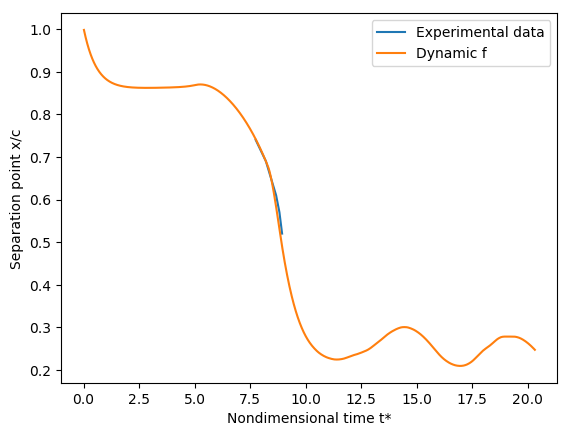

PyObject <matplotlib.legend.Legend object at 0x000000001CFDE518>

In [6]:
plot(t+5,f, label="Experimental data")
#plot(mat2d[:,1],mat2d[:,9],label="Static f")
plot(mat1[:,1],mat1[:,10],label="Dynamic f")

xlabel("Nondimensional time t*")
ylabel("Separation point x/c")
legend()

Fit is acceptable. For $t^*<7.5$ separation point location is overpredicted, but this does not make a huge difference.

In [7]:
data = readdlm("comp_sa_lesp5_m.dat");

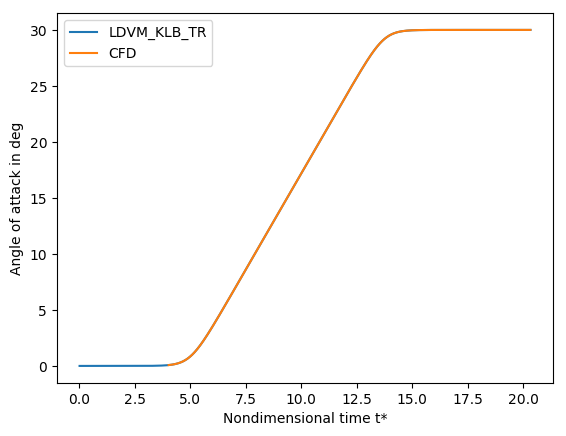

PyObject <matplotlib.legend.Legend object at 0x000000001D33A780>

In [8]:
plot(mat1[:,1],mat1[:,2]*180/pi,label="LDVM_KLB_TR")
plot(data[:,1]+4,data[:,2], label= "CFD")
xlabel("Nondimensional time t*")
ylabel("Angle of attack in deg")
legend()

Data from CFD and LDVM_KLB_TR is synchronized.

In [9]:
# The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
#in the same folder. For eg. "sd7003.dat". 
#The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem,lespcrit)
curfield = TwoDFlowField()

#Now the code is run as :
#The variables mat, surf and curfield are returned
        
@time matldvm, surf, curfield = ldvm(surf, curfield, nsteps, dtstar);

263.588443 seconds (1.47 M allocations: 520.362 MB, 0.10% gc time)


In [10]:
rmsL_1 = rms(data[:,1]+4,data[:,5],mat1[:,1],mat1[:,6])
rmsD_1 = rms(data[:,1]+4,data[:,6],mat1[:,1],mat1[:,7])
rmsM_1 = rms(data[:,1]+4,data[:,7],mat1[:,1],mat1[:,8])

0.8965401227653909

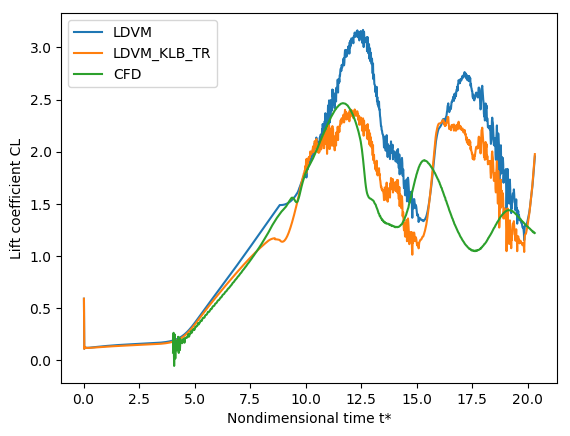

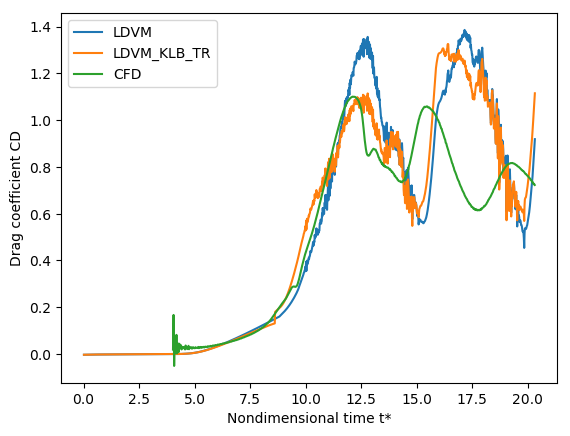

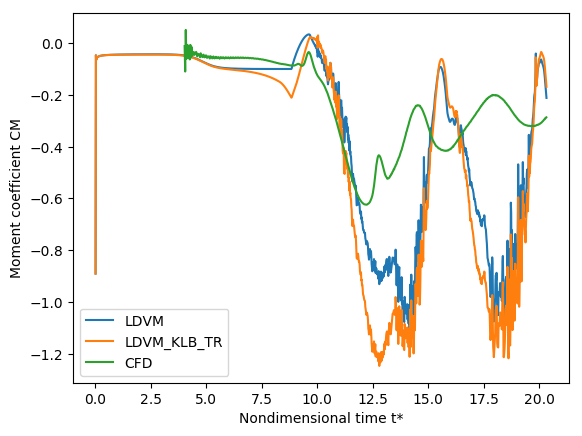

PyObject <matplotlib.legend.Legend object at 0x0000000024D326A0>

In [11]:
plot(matldvm[:,1],matldvm[:,6],label="LDVM")
plot(mat1[:,1],mat1[:,6],label="LDVM_KLB_TR")
plot(data[:,1]+4,data[:,5], label="CFD")
xlabel("Nondimensional time t*")
ylabel("Lift coefficient CL")
legend()
figure()
plot(matldvm[:,1],matldvm[:,7],label="LDVM")
plot(mat1[:,1],mat1[:,7],label="LDVM_KLB_TR")
plot(data[:,1]+4,data[:,6], label="CFD")
xlabel("Nondimensional time t*")
ylabel("Drag coefficient CD")
legend()
figure()
plot(matldvm[:,1],matldvm[:,8],label="LDVM")
plot(mat1[:,1],mat1[:,8],label="LDVM_KLB_TR")
plot(data[:,1]+4,-data[:,7], label="CFD")
xlabel("Nondimensional time t*")
ylabel("Moment coefficient CM")
legend()

Now calculations are repeated with Cs "continuous" model.

In [12]:
# Insert stating constants
    # static constants have been obtained iteratively, so as to give the best fsep prediction
    # fsep prediction was compared to experiment

    #Note how different they are from static constants from 2.3.
    #In my opinion the reason for that is low Reynolds number for this case.
    sepdef = SeparationParams(8.2, 7., 2.3,"Sheng",cs_model="continuous",tf=1.2)

    alphadef = EldUptstartDef(30.*pi/180.,0.03, 0.8, 5.)
    hdef = ConstDef(0.)
    udef = ConstDef(1.) #Freestream velocity is a constant. Set as constant = 1

    #The full kinematics are collected as:
    full_kinem = KinemDef(alphadef, hdef, udef)

    pvt = 0.25 #QC
    lespcrit = [0.17;] #Note that the value is entered as an array. 
    dtstar = find_tstep(alphadef)
    time_total =16.319+4.
    nsteps = Int(round(time_total/dtstar))

# The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
#in the same folder. For eg. "sd7003.dat". 
#The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem,lespcrit)
curfield = TwoDFlowField()

#Now the code is run as :
#The variables mat, surf and curfield are returned
        
@time mat, surf, curfield = ldvm_klb_tr(surf, curfield,sepdef, nsteps, dtstar);


266.601184 seconds (1.31 M allocations: 513.754 MB, 0.08% gc time)


In [13]:
rmsL_2 = rms(data[:,1]+4,data[:,5],mat[:,1],mat[:,6])
rmsD_2 = rms(data[:,1]+4,data[:,6],mat[:,1],mat[:,7])
rmsM_2 = rms(data[:,1]+4,data[:,7],mat[:,1],mat[:,8])

rmsL_ldvm = rms(data[:,1]+4,data[:,5],matldvm[:,1],matldvm[:,6])
rmsD_ldvm = rms(data[:,1]+4,data[:,6],matldvm[:,1],matldvm[:,7])
rmsM_ldvm = rms(data[:,1]+4,data[:,7],matldvm[:,1],matldvm[:,8])

0.7858460145187215

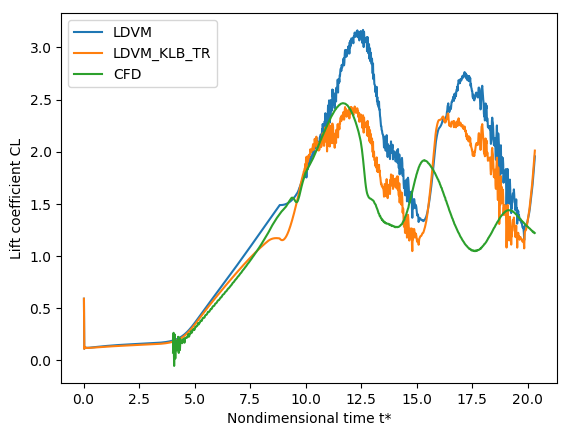

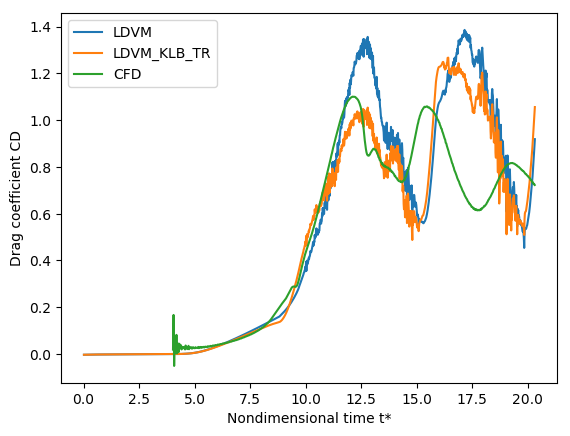

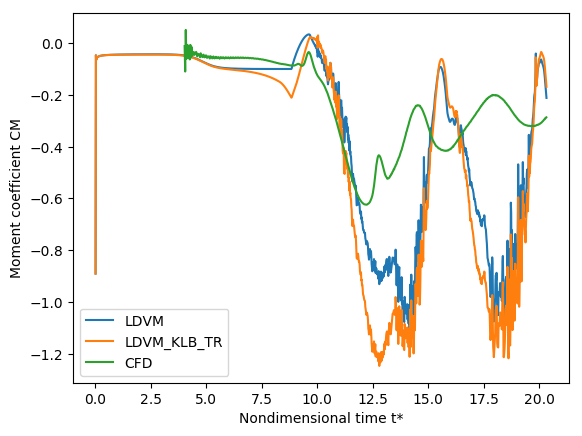

PyObject <matplotlib.legend.Legend object at 0x0000000024DA49B0>

In [14]:
plot(matldvm[:,1],matldvm[:,6],label="LDVM")
plot(mat[:,1],mat[:,6],label="LDVM_KLB_TR")
plot(data[:,1]+4,data[:,5], label="CFD")
xlabel("Nondimensional time t*")
ylabel("Lift coefficient CL")
legend()
figure()
plot(matldvm[:,1],matldvm[:,7],label="LDVM")
plot(mat[:,1],mat[:,7],label="LDVM_KLB_TR")
plot(data[:,1]+4,data[:,6], label="CFD")
xlabel("Nondimensional time t*")
ylabel("Drag coefficient CD")
legend()
figure()
plot(matldvm[:,1],matldvm[:,8],label="LDVM")
plot(mat[:,1],mat[:,8],label="LDVM_KLB_TR")
plot(data[:,1]+4,-data[:,7], label="CFD")
xlabel("Nondimensional time t*")
ylabel("Moment coefficient CM")
legend()

RMSX_1 corresponds to piecewise CS model. RMSX_2 corresponds to continuous CS model. RMSX_LDVM corresponds to LDVM without flow separation

In [15]:
[rmsL_1 rmsL_2 rmsL_ldvm] 

1×3 Array{Float64,2}:
 0.42525  0.436815  0.651347

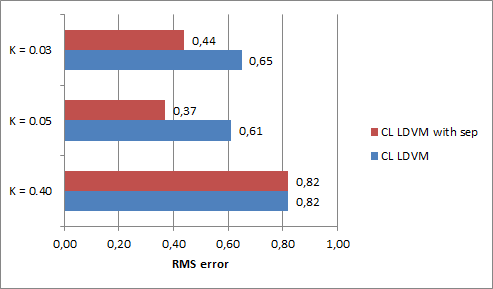

In [16]:
[rmsD_1 rmsD_2 rmsD_ldvm]

1×3 Array{Float64,2}:
 0.219146  0.205237  0.253333

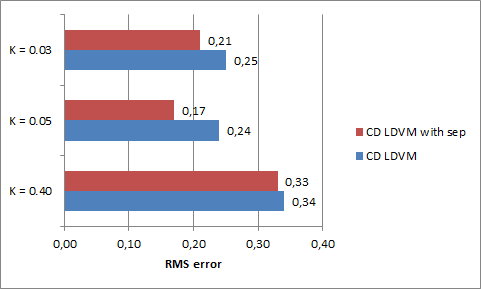

In [17]:
[rmsM_1 rmsM_2 rmsM_ldvm]

1×3 Array{Float64,2}:
 0.89654  0.89654  0.785846

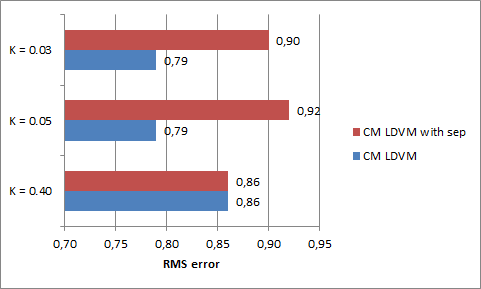